## En este ejercicio vamos a hacer una votación de clasificadores ##

( Credits to https://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/)
***

**Ensembling** es combinar distintos algoritmos -o distintos clasificadores- para hacer las predicciones.

En este caso vamos a entrenar un clasificador que vota, usando como parámetros otros clasificadores, y su predicción es la mas votada.

 <div class="alert alert-block alert-info">
A la hora de elegir clasificadores para el ensemble, interesa que los algoritmos sean "distintos" en el sentido de que den distinto peso a las features, para que los votos de los algoritmos sean diferentes al clasificar los casos límite. 
<br>

( Ver ejercicio de feature importances para saber como calcular que features son mas importantes)
</div>



Hay matices entre hacer :
 - **ensembling**, es decir, combinar varios clasificadores. 

 - **stacking**, es usar la salida de varios clasificadores, como entrada para otro.
 
 
<div class="alert alert-block alert-success">
Al stacking se le llama tambien hacer un meta-clasificador. __[Ejemplo de stacking](https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/)__ 
<div>



In [70]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target


Generamos tres clasificadores, y calculamos su precisión (accuracy).

In [71]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

##############################################################################################
#### Usamos tres clasificadores diferentes
##############################################################################################

clf1 = LogisticRegression(random_state=8)
clf2 = Perceptron()
clf3 =  SVC(kernel="linear", C=0.02)

print('5-fold cross validation:\n')

labels = ['Logistic Regression', 'Perceptron',  "Linear SVM"]
kfold = KFold(n_splits=8)

for clf, label in zip([clf1, clf2, clf3], labels):

    scores = model_selection.cross_val_score(clf, X, y,  cv=kfold )
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.69 (+/- 0.30) [Logistic Regression]
Accuracy: 0.67 (+/- 0.41) [Perceptron]
Accuracy: 0.63 (+/- 0.28) [Linear SVM]


Ahora definimos un **EnsembleVoteClassifier**, 
que hace una votación y predice la solución mas votada.

Mirando los resultados, vemos que mejora a los demás algoritmos por separado.

In [72]:
from mlxtend.classifier import EnsembleVoteClassifier

##############################################################################################
###### Aqui es donde definimos un nuevo clasificador, que va a ser una votación de los otros.
##############################################################################################
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])
labels = ['Logistic Regression', 'Perceptron',  "Linear SVM", 'Ensemble']

for clf, label in zip([clf1, clf2, clf3, eclf], labels):
    scores = model_selection.cross_val_score(clf, X, y,  cv=kfold )

    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.69 (+/- 0.30) [Logistic Regression]
Accuracy: 0.67 (+/- 0.41) [Perceptron]
Accuracy: 0.63 (+/- 0.28) [Linear SVM]
Accuracy: 0.67 (+/- 0.32) [Ensemble]


## Mostramos el resultado graficamente ##

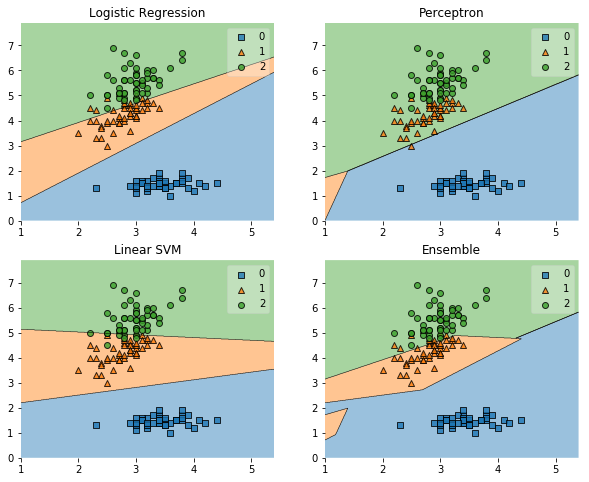

In [73]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools


gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))
for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)

## Bonus : K-Fold validation
<br>
 <div class="alert alert-block alert-info">

La validación cruzada o cross-validation es una técnica utilizada para evaluar los resultados de un análisis estadístico y garantizar que son independientes de la partición entre datos de entrenamiento y prueba. <br>
Consiste en repetir y calcular la media aritmética obtenida de las medidas de evaluación sobre diferentes particiones
</div>



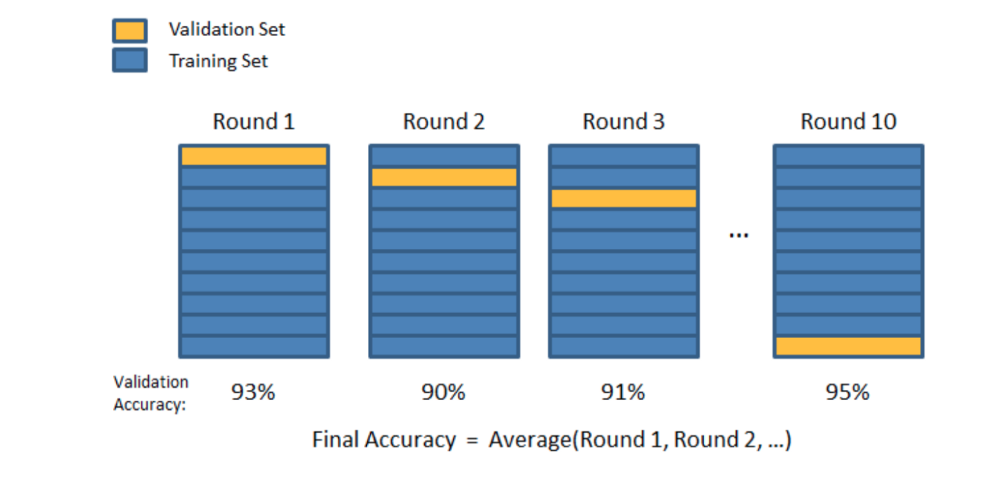

In [69]:
from IPython.display import Image
Image(filename='images/k-fold.png', width=500) 

In [ ]:
kfold = KFold(n_splits=8)

for clf, label in zip([clf1, clf2, clf3], labels):

    scores = model_selection.cross_val_score(clf, X, y,  cv=kfold )
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))